In [1]:
# Import the dependencies. 
import pandas as pd
import matplotlib. pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [8]:
# Import the time library and the datetime module from datetime library.
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | conceicao do araguaia
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | gonen
Processing Record 6 of Set 1 | harper
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | gejiu
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | saint-francois
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | mungwi
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | muhos
Processing Record 21 of Set 1 | ilulissat
Processing

Processing Record 35 of Set 4 | bilibino
Processing Record 36 of Set 4 | riberalta
Processing Record 37 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 38 of Set 4 | namatanai
Processing Record 39 of Set 4 | tessalit
Processing Record 40 of Set 4 | somerset east
Processing Record 41 of Set 4 | sampit
Processing Record 42 of Set 4 | isla mujeres
Processing Record 43 of Set 4 | ukiah
Processing Record 44 of Set 4 | tsiroanomandidy
Processing Record 45 of Set 4 | nanticoke
Processing Record 46 of Set 4 | okoneshnikovo
Processing Record 47 of Set 4 | half moon bay
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | chhuikhadan
Processing Record 50 of Set 4 | resavica
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | oksfjord
Processing Record 4 of Set 5 | aasiaat
Processing Record 5 of Set 5 | noshiro
Processing Record 6 of Set 5 | grand centre
City not found. Skipping...
Processing Record 

Processing Record 27 of Set 8 | almeirim
Processing Record 28 of Set 8 | iqaluit
Processing Record 29 of Set 8 | tidore
City not found. Skipping...
Processing Record 30 of Set 8 | poum
Processing Record 31 of Set 8 | micheweni
Processing Record 32 of Set 8 | strezhevoy
Processing Record 33 of Set 8 | haapiti
Processing Record 34 of Set 8 | luchegorsk
Processing Record 35 of Set 8 | talah
City not found. Skipping...
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | primore
City not found. Skipping...
Processing Record 38 of Set 8 | yokadouma
Processing Record 39 of Set 8 | carmarthen
Processing Record 40 of Set 8 | dubenskiy
City not found. Skipping...
Processing Record 41 of Set 8 | ghatanji
Processing Record 42 of Set 8 | birao
Processing Record 43 of Set 8 | road town
Processing Record 44 of Set 8 | peace river
Processing Record 45 of Set 8 | midland
Processing Record 46 of Set 8 | palmas
Processing Record 47 of Set 8 | gorodishche
Processing Recor

Processing Record 12 of Set 12 | lolua
City not found. Skipping...
Processing Record 13 of Set 12 | metz
Processing Record 14 of Set 12 | butajira
Processing Record 15 of Set 12 | vila velha
Processing Record 16 of Set 12 | ojinaga
Processing Record 17 of Set 12 | kamenka
Processing Record 18 of Set 12 | bandarbeyla
Processing Record 19 of Set 12 | rudsar
Processing Record 20 of Set 12 | chapeco
Processing Record 21 of Set 12 | saurimo
Processing Record 22 of Set 12 | galle
Processing Record 23 of Set 12 | mahonda
Processing Record 24 of Set 12 | gravdal
Processing Record 25 of Set 12 | zhigansk
Processing Record 26 of Set 12 | elizabeth city
Processing Record 27 of Set 12 | mendi
Processing Record 28 of Set 12 | kautokeino
Processing Record 29 of Set 12 | pacific grove
Processing Record 30 of Set 12 | pitimbu
Processing Record 31 of Set 12 | smithers
Processing Record 32 of Set 12 | sur
Processing Record 33 of Set 12 | flinders
Processing Record 34 of Set 12 | narkevychi
Processing Re

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame. 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,56,20,24.16,AR,2021-10-30 01:52:54
1,Conceicao Do Araguaia,-8.2578,-49.2647,82.40,53,92,4.16,BR,2021-10-30 01:52:55
2,Butaritari,3.0707,172.7902,83.28,68,4,16.20,KI,2021-10-30 01:52:55
3,Cape Town,-33.9258,18.4232,63.09,82,75,3.00,ZA,2021-10-30 01:48:16
4,Gonen,40.1049,27.6540,59.02,49,62,9.51,TR,2021-10-30 01:52:56
5,Harper,4.3750,-7.7169,77.16,85,100,5.64,LR,2021-10-30 01:52:57
6,Albany,42.6001,-73.9662,48.61,76,90,4.00,US,2021-10-30 01:52:57
7,Arraial Do Cabo,-22.9661,-42.0278,68.92,89,100,17.52,BR,2021-10-30 01:52:58
8,Gejiu,23.3060,103.1635,55.81,92,99,4.14,CN,2021-10-30 01:52:58
9,Salalah,17.0151,54.0924,77.25,70,7,3.38,OM,2021-10-30 01:50:45


In [11]:
# New column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-30 01:52:54,-54.8000,-68.3000,42.46,56,20,24.16
1,Conceicao Do Araguaia,BR,2021-10-30 01:52:55,-8.2578,-49.2647,82.40,53,92,4.16
2,Butaritari,KI,2021-10-30 01:52:55,3.0707,172.7902,83.28,68,4,16.20
3,Cape Town,ZA,2021-10-30 01:48:16,-33.9258,18.4232,63.09,82,75,3.00
4,Gonen,TR,2021-10-30 01:52:56,40.1049,27.6540,59.02,49,62,9.51
5,Harper,LR,2021-10-30 01:52:57,4.3750,-7.7169,77.16,85,100,5.64
6,Albany,US,2021-10-30 01:52:57,42.6001,-73.9662,48.61,76,90,4.00
7,Arraial Do Cabo,BR,2021-10-30 01:52:58,-22.9661,-42.0278,68.92,89,100,17.52
8,Gejiu,CN,2021-10-30 01:52:58,23.3060,103.1635,55.81,92,99,4.14
9,Salalah,OM,2021-10-30 01:50:45,17.0151,54.0924,77.25,70,7,3.38


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

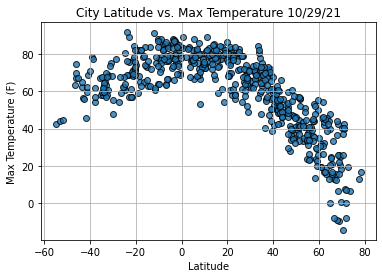

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

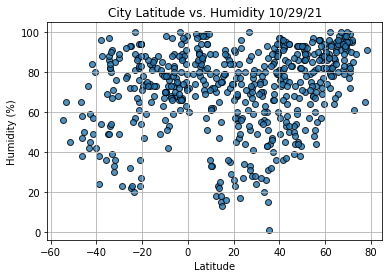

In [15]:
# Build the scatter plot for latitude vs. humidity. 
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

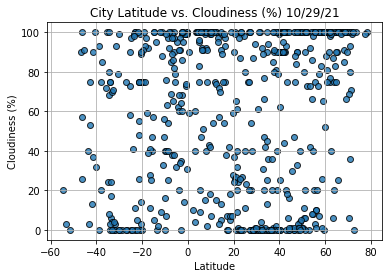

In [16]:
# Build the scatter plot for latitude vs. cloudiness. 
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

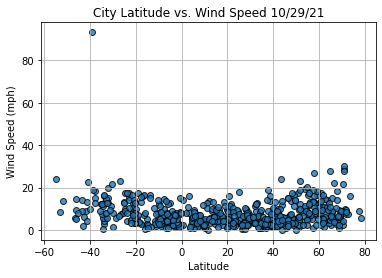

In [17]:
# Build the scatter plot for latitude vs. wind speed. 
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data 
# and plot a regression line and the equation with the data. 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere wather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regresseion line "y values" from the slope and intercept. 
    regress_values = x_values * slope + intercept
    # Get the equation of the line. 
    line_eq = " y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line. 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [71]:
index13 = city_data_df.loc[13]
index13

City               Ribeira Grande
Country                        PT
Date          2021-10-30 01:53:01
Lat                       38.5167
Lng                         -28.7
Max Temp                    69.53
Humidity                       90
Cloudiness                     81
Wind Speed                  13.73
Name: 13, dtype: object

In [72]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
553     True
554    False
555     True
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [73]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Butaritari,KI,2021-10-30 01:52:55,3.0707,172.7902,83.28,68,4,16.20
4,Gonen,TR,2021-10-30 01:52:56,40.1049,27.6540,59.02,49,62,9.51
5,Harper,LR,2021-10-30 01:52:57,4.3750,-7.7169,77.16,85,100,5.64
6,Albany,US,2021-10-30 01:52:57,42.6001,-73.9662,48.61,76,90,4.00
8,Gejiu,CN,2021-10-30 01:52:58,23.3060,103.1635,55.81,92,99,4.14


In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

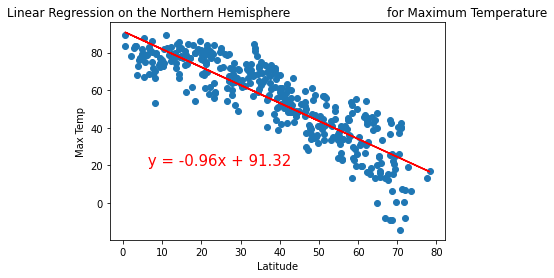

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,20))

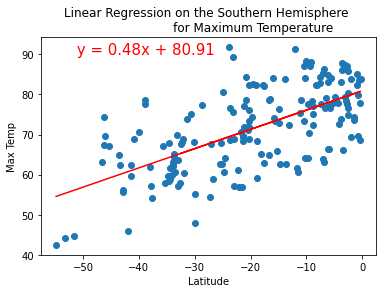

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                       for Maximum Temperature', 'Max Temp',(-52,90))

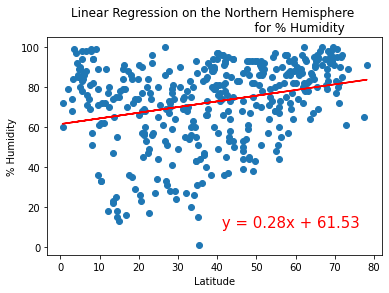

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function. 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n\
                                            for % Humidity', '% Humidity',(40,10))

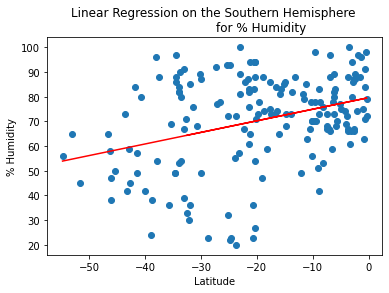

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))

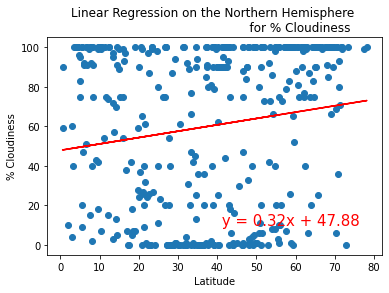

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function. 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n\
                                            for % Cloudiness', '% Cloudiness',(40,10))

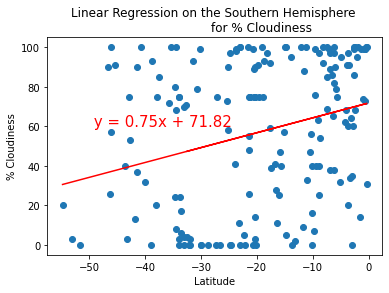

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

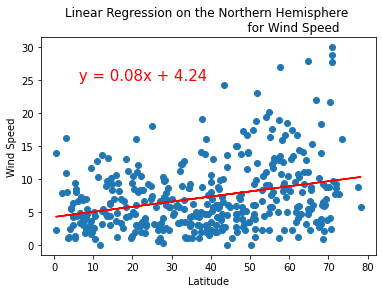

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function. 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n\
                                            for Wind Speed', 'Wind Speed',(5,25))

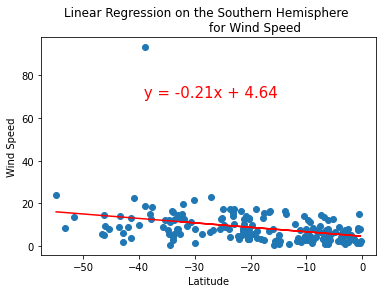

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-40,70))